In [3]:
import numpy as np
import pandas as pd
import re

import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('car_price_prediction_updated.csv')
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.000000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


In [10]:
data = data.drop(data['Price'].idxmax())
data = data.drop(data['Price'].idxmin())

In [17]:
min_row = data.loc[data['Price'].idxmin()]
min_row

Price                        1
Levy                906.838128
Manufacturer              OPEL
Model                    Astra
Category                 Sedan
Leather interior           Yes
Fuel type               Petrol
Engine volume              1.6
Mileage                 122231
Cylinders                  4.0
Gear box type           Manual
Drive wheels             Front
Wheel               Left wheel
Color                   Silver
Airbags                      4
Age                         26
Name: 7815, dtype: object

In [5]:
data['Age'].unique()

array([15, 14, 19, 11,  9, 12, 18, 26, 28,  7, 17, 13,  8, 24, 30, 16, 25,
        6, 10, 21, 27, 35, 20, 22, 40, 29, 23, 32, 33, 37, 48, 36, 31,  5,
       41, 39, 34, 42, 72, 61, 51, 38, 82, 47, 60, 49, 68, 45, 86, 57, 78,
       43, 44, 52], dtype=int64)

In [22]:
(data['Price'] <= 1000).sum()


2585

In [15]:
data['Price'].max()

26307500

In [16]:
data['Price'].min()

1

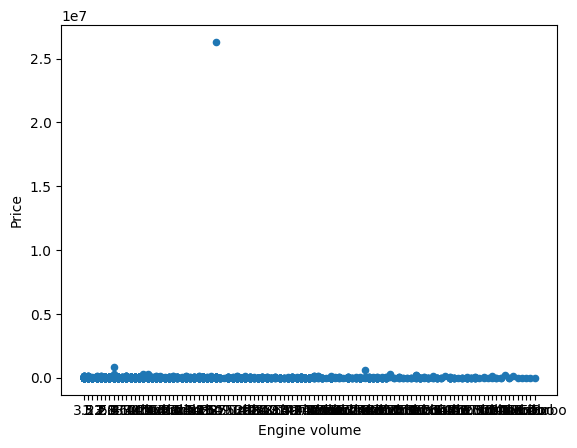

In [5]:
import matplotlib.pyplot as plt

data.plot.scatter(x='Engine volume', y='Price')
plt.show()


In [ ]:
print(data[['Price','Engine Volume','Cylinders','Levy','Wheel']].isnull().sum())
print(data[['Price','Engine Volume','Cylinders']].corr()['Price'].sort_values(ascending=False))

Price            0
Engine Volume    0
Cylinders        0
Levy             0
Wheel            0
dtype: int64
Price            1.000000
Engine Volume    0.007855
Cylinders        0.007378
Name: Price, dtype: float64


In [3]:
data['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [4]:
data['Color'].value_counts()

Color
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  Age               19237 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memo

In [6]:
mfr_counts = data['Manufacturer'].value_counts()
mfr_to_keep = mfr_counts[mfr_counts >= 10].index
data = data[data['Manufacturer'].isin(mfr_to_keep)]

color_counts = data['Color'].value_counts()
colors_to_keep = color_counts[color_counts >= 40].index
data = data[data['Color'].isin(colors_to_keep)]

data.reset_index(drop=True, inplace=True)

In [7]:
def clean_model_name(text):
    if pd.isna(text):
        return text
    text = str(text).upper().strip()
    text = re.sub(r'[^A-Z0-9 ]', ' ', text)
    text = " ".join(text.split())
    return text

data['Model'] = data['Model'].apply(clean_model_name)

data['Model'] = data['Model'].astype(str).str.strip().str.upper()

model_counts = data['Model'].value_counts()
models_to_keep = model_counts[model_counts > 2].index

data = data[data['Model'].isin(models_to_keep)].reset_index(drop=True)

In [27]:
data['Manufacturer'] = data['Manufacturer'].str.upper().str.strip()

def clean_engine_volume(value):
    value = str(value).lower()
    is_turbo = 1 if 'turbo' in value else 0
    
    numeric_part = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    volume = float(numeric_part[0]) if numeric_part else 0.0
    return volume, is_turbo

data[['Engine_Volume_Num', 'Is_Turbo']] = data['Engine volume'].apply(
    lambda x: pd.Series(clean_engine_volume(x))
)

data = data[data['Price'] > 100].reset_index(drop=True)

print("Cleaning Complete.")
print(data[['Manufacturer', 'Engine_Volume_Num', 'Is_Turbo', 'Price']].head())

Cleaning Complete.
  Manufacturer  Engine_Volume_Num  Is_Turbo  Price
0        LEXUS                3.5       0.0  13328
1    CHEVROLET                3.0       0.0  16621
2        HONDA                1.3       0.0   8467
3         FORD                2.5       0.0   3607
4        HONDA                1.3       0.0  11726


In [28]:
data = data.drop(columns=['Is_Turbo', 'Engine volume'], axis=1)

In [29]:
data.rename(columns={
    'Engine_Volume_Num': 'Engine Volume'
}, inplace=True)

In [11]:
data

,Price,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Color,Airbags,Age,Engine Volume
0,13328,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,Automatic,4x4,Silver,12,15,3.5
1,16621,CHEVROLET,EQUINOX,Jeep,No,Petrol,192000,Tiptronic,4x4,Black,8,14,3.0
2,8467,HONDA,FIT,Hatchback,No,Petrol,200000,Variator,Front,Black,2,19,1.3
3,3607,FORD,ESCAPE,Jeep,Yes,Hybrid,168966,Automatic,4x4,White,0,14,2.5
4,11726,HONDA,FIT,Hatchback,Yes,Petrol,91901,Automatic,Front,Silver,4,11,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17605,8467,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,300000,Manual,Rear,Silver,5,26,2.0
17606,15681,HYUNDAI,SONATA,Sedan,Yes,Petrol,161600,Tiptronic,Front,Red,8,14,2.4
17607,26108,HYUNDAI,TUCSON,Jeep,Yes,Diesel,116365,Automatic,Front,Grey,4,15,2.0
17608,5331,CHEVROLET,CAPTIVA,Jeep,Yes,Diesel,51258,Automatic,Front,Black,4,18,2.0


In [12]:
X = data.drop(['Price'] , axis=1)
y = data['Price']

In [13]:
## checking numeric columns skewness
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

skewness = data[numeric_cols].skew().sort_values(ascending=False)
skewness

Price            131.212883
Mileage           39.756745
Engine Volume      2.301452
Age                1.687475
Airbags            0.092644
dtype: float64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

## tranformation of each column accordling for model training

one_hot = ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color']

power_transform = ['Mileage', 'Age', 'Engine Volume']

standard_transform = ['Airbags']

binary_tranform = ['Leather interior']

high_cardinal = ['Manufacturer', 'Model']

## pipelines for each of the column as per need 

standard_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

power_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer(method='yeo-johnson'))
])

one_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False
    ))
])

binary_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['No', 'Yes']], dtype=int))
])

In [15]:
## cannot be done labelencoding, onehot and ordinal for manufacture and model so using base estimator and transformer mixin for converting to numeric

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_maps = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True)
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            X[col] = X[col].map(self.freq_maps[col]).fillna(0)
        return X.values


high_card_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('freq', FrequencyEncoder())
])

In [16]:
transformer = ColumnTransformer([
    ('standard', standard_pipe, standard_transform),
    ('power', power_pipe, power_transform),
    ('onehot', one_pipe, one_hot),
    ('binary', binary_pipe, binary_tranform),
    ('high_card', high_card_pipe, high_cardinal)
], remainder='passthrough')


In [17]:
y = np.log1p(data['Price'])

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeCV, LassoCV

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.3,
    random_state=42)

In [20]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "LassoCV": LassoCV()
}

for name, model in models.items():

    pipe = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_test_pred_log  = pipe.predict(X_test)

    y_test_pred  = np.expm1(y_test_pred_log)

    y_test_real  = np.expm1(y_test)

    print(name)
    print("Test  MAE:", mean_absolute_error(y_test_real, y_test_pred))
    print("Test MSE", mean_squared_error(y_test_real, y_test_pred))
    print("Test  R2 :", r2_score(y_test_real, y_test_pred))
    print("="*40)

LinearRegression
Test  MAE: 15098.729438700015
Test MSE 131192020617.44316
Test  R2 : -0.0006367204294777107
Lasso
Test  MAE: 16816.454239211726
Test MSE 131274436950.8087
Test  R2 : -0.0012653319040214495
ElasticNet
Test  MAE: 16816.454239211726
Test MSE 131274436950.8087
Test  R2 : -0.0012653319040214495
Ridge
Test  MAE: 15093.661622574902
Test MSE 131191557536.46185
Test  R2 : -0.0006331883866579346
RidgeCV
Test  MAE: 15097.969575268813
Test MSE 131191965305.09032
Test  R2 : -0.0006362985473302718
LassoCV
Test  MAE: 15085.960736033692
Test MSE 131189620991.17416
Test  R2 : -0.0006184178364634363


In [21]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

ensemble_transformer = ColumnTransformer([
    ('num', num_pipe, power_transform + standard_transform),
    ('onehot', one_pipe, one_hot),
    ('binary', binary_pipe, binary_tranform),
    ('high_card', high_card_pipe, high_cardinal)
], remainder='passthrough')


In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, HistGradientBoostingRegressor
)

from xgboost import XGBRegressor

ensemble_models = {
    'Random Forest': RandomForestRegressor(),
    'Ada Boost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Gradient Boost': GradientBoostingRegressor(),
    'Hist Gradient Boost': HistGradientBoostingRegressor(),
    'XG Boost': XGBRegressor()
}

In [23]:
for name, model in ensemble_models.items():

    pipe = Pipeline([
        ('preprocess', ensemble_transformer),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_test_pred_log  = pipe.predict(X_test)

    y_test_pred  = np.expm1(y_test_pred_log)

    y_test_real  = np.expm1(y_test)

    print(name)
    print("Test  MAE:", mean_absolute_error(y_test_real, y_test_pred))
    print("Test  R2 :", r2_score(y_test_real, y_test_pred))
    print("="*40)

Decision Tree
Test  MAE: 10053.675348833767
Test  R2 : 0.00032837503496907505
Random Forest
Test  MAE: 9283.04125888466
Test  R2 : 0.00046782159428737646
Ada Boost
Test  MAE: 14263.648364591809
Test  R2 : -0.0008479904410363392
Extra Trees
Test  MAE: 8982.922285991273
Test  R2 : 0.0005675549276238367
Gradient Boost
Test  MAE: 11723.561841343842
Test  R2 : -1.5743503688270266e-05
Hist Gradient Boost
Test  MAE: 10540.943942863865
Test  R2 : 0.00038423906768836336
XG Boost
Test  MAE: 10434.463975757986
Test  R2 : 0.00015485648276947206


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
svr_pipe = Pipeline([
    ('preprocess', transformer),
    ('model', SVR(kernel='rbf'))
])

svr_param_dist = {
    'model__C': loguniform(1e-1, 1e3),
    'model__gamma': loguniform(1e-3, 1e-1),
    'model__epsilon': uniform(0.01, 0.2)
}
svr_random = RandomizedSearchCV(
    svr_pipe,
    svr_param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

svr_random.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
rf_pipe = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    'model__n_estimators': [200, 400, 600, 800],
    'model__max_depth': [None, 10, 15, 20, 25],
    'model__min_samples_leaf': [1, 3, 5, 10],
    'model__max_features': ['sqrt', 0.5, 0.7]
}

rf_random = RandomizedSearchCV(
    rf_pipe,
    rf_param_dist,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Levy',
                                                                                'Mileage',
                                                                                'Cylinders',
                                                                                'Age',
                                                                                'Engine '
                                                                                'Volume',
                                                                                'Airbags']),
                                                                              ('onehot',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotE...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('freq',
                                                                                                FrequencyEncoder())]),
                                                                               ['Manufacturer',
                                                                                'Model'])])),
                                             ('model',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 15, 20,
                                                             25],
                                        'model__max_features': ['sqrt', 0.5,
                                                                0.7],
                                        'model__min_samples_leaf': [1, 3, 5,
                                                                    10],
                                        'model__n_estimators': [200, 400, 600,
                                                                800]},
                   random_state=42, scoring='r2')

In [42]:
et_pipe = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', ExtraTreesRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

et_param_dist = {
    'model__n_estimators': [300, 500, 700, 900],
    'model__max_depth': [None, 15, 20, 25],
    'model__min_samples_leaf': [1, 3, 5],
    'model__max_features': ['sqrt', 0.5, 0.7]
}

et_random = RandomizedSearchCV(
    et_pipe,
    et_param_dist,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

et_random.fit(X_train, y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
hyper_tune_models = {
    'SVR': svr_random,
    'RandomForest': rf_random,
    'ExtraTrees': et_random
}

for name, rs in hyper_tune_models.items():
    print(name)
    print("Best CV R2:", rs.best_score_)
    print("Best Params:", rs.best_params_)
    print("="*40)

SVR
Best CV R2: 0.43959983808100445
Best Params: {'model__C': 15.375920235481747, 'model__epsilon': 0.04697089110510541, 'model__gamma': 0.08692991511139551}
RandomForest
Best CV R2: 0.6390123263595453
Best Params: {'model__n_estimators': 800, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': None}
ExtraTrees
Best CV R2: 0.6118763923426973
Best Params: {'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_features': 0.7, 'model__max_depth': 25}


In [44]:
final_rf = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', RandomForestRegressor(
        n_estimators=800,
        max_depth=None,
        min_samples_leaf=1,
        max_features=0.5,
        random_state=42,
        n_jobs=-1
    ))
])

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_rf,
    X,
    y,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("CV R2 scores:", cv_scores)
print("Mean CV R2   :", np.mean(cv_scores))
print("Std CV R2    :", np.std(cv_scores))

ValueError: Found input variables with inconsistent numbers of samples: [17602, 15884]

In [ ]:
import joblib
joblib.dump(final_rf, "random_forest_car_price_model.pkl")

['random_forest_car_price_model.pkl']